In [1]:
#default params
rna_enhancers_counts_path = "10X_PBMC/04_count/pbmc_granulocyte_sorted_10k_counts_per_cell.txt"


# Parameters for filtering enhancers/cells and thresholds
# min_cells: keep only enhancers expressed in at least X cells
# min_enhancers: keep only cells that express at least X enhancers
# rna_threshold: minimum RNA expression to count as expressed
# atac_threshold: minimum ATAC signal to count as expressed

# Defaults (you can change these when running the notebook)
min_cells <- 10        # X: enhancer must be seen in at least this many cells
min_enhancers <- 10   # X: cell must express at least this many enhancers


filtered_erna_path = "10X_PBMC/05_erna_preprocess/filtered_erna_pbmc_granulocyte_sorted_10k.rds"

In [2]:
# Parameters
min_cells = 10
min_enhancer_counts = 10
rna_enhancers_counts_path = "10X_PBMC/04_count/pbmc_granulocyte_sorted_10k_counts_per_cell.txt"


# eRNA count matrix -raw analysis

In [3]:
library(magrittr)
library(dplyr)
library(stringi)
library(Matrix)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
setwd(here::here()) # set working directory to project root
getwd()

[1] "/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA"

Load data:

In [5]:
library(data.table)

rna_enhancers <- data.table::fread(rna_enhancers_counts_path, header = TRUE, sep = "\t", data.table = FALSE)



Attaching package: ‘data.table’




The following objects are masked from ‘package:dplyr’:

    between, first, last




In [6]:
# gene column to rownames
rownames(rna_enhancers) <- rna_enhancers$gene
rna_enhancers$gene <- NULL

In [7]:
rna_enhancers[1:10, 1:10]

,AAACAGCCAAGGAATC,AAACAGCCAATCCCTT,AAACAGCCAATGCGCT,AAACAGCCACACTAAT,AAACAGCCACCAACCG,AAACAGCCAGGATAAC,AAACAGCCAGTAGGTG,AAACAGCCAGTTTACG,AAACAGCCATCCAGGT,AAACATGCAAGGTCCT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSR10_739T55,0,0,0,0,0,0,0,0,0,0
ENSR10_73C2H3,0,0,0,0,0,0,0,0,0,0
ENSR10_73MXBJ,0,0,0,0,0,0,0,0,0,0
ENSR10_73PWXH,0,0,0,0,0,0,0,0,0,0
ENSR10_74JXL6,0,0,0,0,0,0,0,0,0,0
ENSR10_74XTX8,0,0,0,0,0,0,0,0,0,0
ENSR10_75K6Q4,0,0,0,0,0,0,0,0,0,0
ENSR10_75KNGK,0,0,0,0,0,0,0,0,0,0
ENSR10_75MJTZ,0,0,0,0,0,0,0,0,0,0


In [8]:
dim(rna_enhancers)

[1] 81246 11907

In [9]:
rna_enhancers = Matrix(as.matrix(rna_enhancers),sparse = TRUE)

In [10]:
# unexpressed cells count
unexpr_cells = colSums(rna_enhancers==0)
paste0("unexpressed cells: ", sum(unexpr_cells==nrow(rna_enhancers))," out of ", ncol(rna_enhancers))
# unexpressed rows count
unexpr_rows = rowSums(rna_enhancers==0)
paste0("unexpressed eRNA: ", sum(unexpr_rows==ncol(rna_enhancers))," out of ", nrow(rna_enhancers))



[1] "unexpressed cells: 0 out of 11907"

[1] "unexpressed eRNA: 0 out of 81246"

In [11]:
# precent of zeros in the matrix
print(paste0(" precent of zeros: ",sum(rna_enhancers == 0) / (nrow(rna_enhancers) * ncol(rna_enhancers))))



[1] " precent of zeros: 0.997858002577356"


In [12]:
# show first 100 sums of cells
colSums(rna_enhancers) %>% head(10)

AAACAGCCAAGGAATC AAACAGCCAATCCCTT AAACAGCCAATGCGCT AAACAGCCACACTAAT 
             419              207              306               61 
AAACAGCCACCAACCG AAACAGCCAGGATAAC AAACAGCCAGTAGGTG AAACAGCCAGTTTACG 
             236              123              647              141 
AAACAGCCATCCAGGT AAACATGCAAGGTCCT 
             337              130

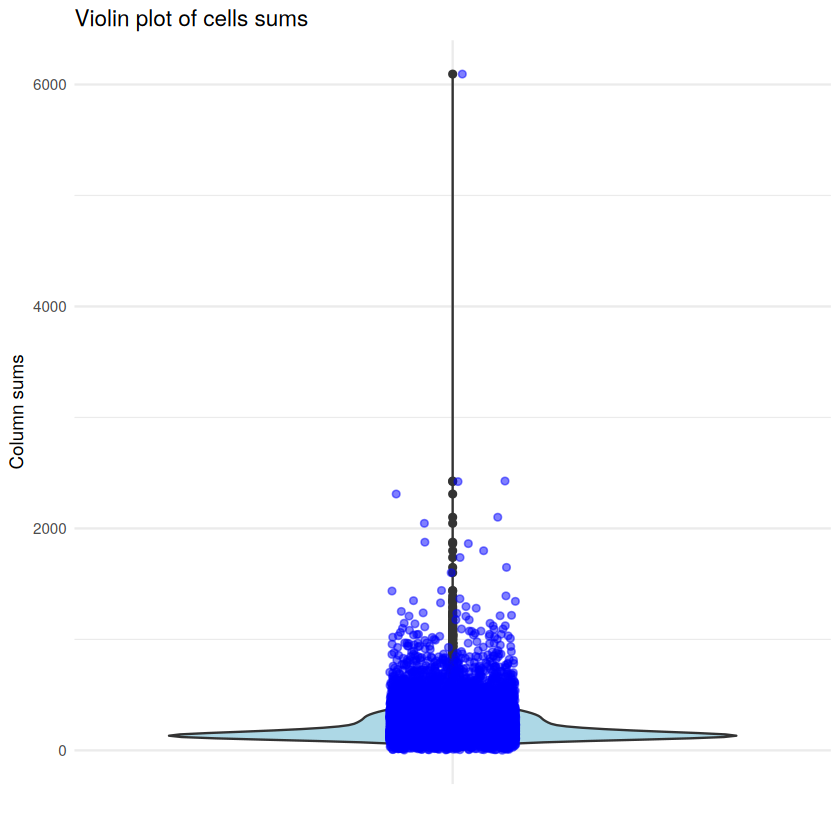

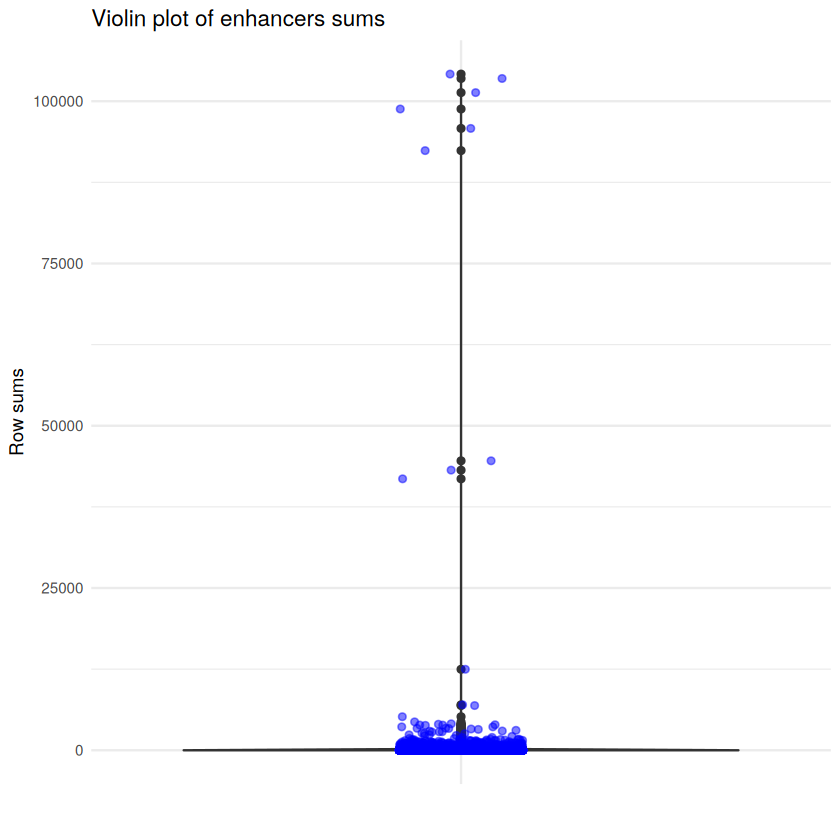

In [13]:
# violin plot of column sums with jittered points
data_cols = data.frame(sum = colSums(rna_enhancers))
library(ggplot2)
p = ggplot(data_cols, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of cells sums", x = "", y = "Column sums") +
  theme_minimal()

print(p)
# violin plot of row sums
data_rows = data.frame(sum = rowSums(rna_enhancers))
p = ggplot(data_rows, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of enhancers sums", x = "", y = "Row sums") +
  theme_minimal()
print(p)


# Filter

In [14]:
# keep only enhancers that expressed in at least min_cells cells
rows_to_keep = which(rowSums(rna_enhancers >= 1) >= min_cells)
print(length(rows_to_keep))
print( "enhancers out of " )
print(nrow(rna_enhancers))

# keep only cells that expressed in at least min_enhancers enhancers
cols_to_keep = which(colSums(rna_enhancers >= 1) >= min_enhancers)
print(length(cols_to_keep))
print( "cells out of " )
print(ncol(rna_enhancers))


[1] 29683


[1] "enhancers out of "


[1] 81246


[1] 11868


[1] "cells out of "


[1] 11907


In [15]:
rna_enhancers = rna_enhancers[rows_to_keep, cols_to_keep]

In [16]:
saveRDS(rna_enhancers, file = filtered_erna_path)